In [206]:
from pathlib import Path
from tqdm.notebook import tqdm
import random
from tabulate import tabulate
from omnibelt import load_json, save_json
from collections import Counter

In [217]:
# dataroot = Path('../extra')
dataroot = Path(r'C:\Users\anwan\Documents\workspace\local_data\concept_net')

In [218]:
# datapath = dataroot / 'conceptnet-assertions-5.7.0.csv'
datapath = dataroot / 'assertions.csv'
# assert datapath.exists()

In [216]:
# count = 0
# with open(datapath, 'r', encoding="utf8") as fread:
# 	with open(dataroot / 'en.csv', 'w', encoding="utf8") as fwrite:
# 		for line in tqdm(fread, total=34074917):
# 			terms = line.split('\t')
# 			if terms[2].startswith('/c/en/') and terms[3].startswith('/c/en/'):
# 				fwrite.write('\t'.join(process_line(line)) + '\n')
# 				count += 1
# count # 3423004

In [ ]:
# with open(datapath, 'r', encoding="utf8") as f:
# 	for i in range(3):
# 		print(f.readline())

In [ ]:
enpath = dataroot / 'en.csv'
assert enpath.exists()

In [220]:
# with open(datapath, "rbU") as f:
#     num_lines = sum(1 for _ in tqdm(f)) # 34074917

In [10]:
# f = open(datapath, 'r', encoding="utf8")

In [5]:
# itr = tqdm(f, total=34074917)

In [212]:
# rows = []
# with open(datapath, 'r', encoding="utf8") as f:
# 	itr = tqdm(f, total=34074917)
# 	for line in itr:
# 		terms = line.split('\t')
# 		if terms[1] == '/r/Causes' and terms[2].startswith('/c/en/') and terms[3].startswith('/c/en/'):
# 			rows.append([terms[1], terms[2], terms[3], terms[-1].split(' ')[-1][:-2]])
# 		# if len(rows) > 10:
# 		# 	break
# 		# itr.set_description(f'rows={len(rows)}')
# save_json(rows, dataroot / 'causes.json')
rows = load_json(dataroot / 'causes.json')
len(rows)

16801

In [221]:
print(tabulate(random.choices(rows, k=10), headers=['relation', 'term1', 'term2', 'weight']))

relation    term1                       term2                              weight
----------  --------------------------  -------------------------------  --------
/r/Causes   /c/en/writing_term_paper    /c/en/rush_to_get_done                  1
/r/Causes   /c/en/chopping_firewood     /c/en/injuries                          1
/r/Causes   /c/en/driving_to_work       /c/en/getting_to_work_early             1
/r/Causes   /c/en/tying_shoelace        /c/en/frustration                       1
/r/Causes   /c/en/having_shower         /c/en/smelling_good                     1
/r/Causes   /c/en/going_to_market       /c/en/fill_up_refrigerator              2
/r/Causes   /c/en/analysing             /c/en/learning_more_about               1
/r/Causes   /c/en/setting_cup_on_table  /c/en/permanent_stains_on_table         1
/r/Causes   /c/en/conducting_trial      /c/en/asking_questions                  1
/r/Causes   /c/en/competing             /c/en/tension                           1


In [174]:
# Counter([row[-1] for row in rows])

In [175]:
vocab = set(word for row in rows for word in row[1:3])
len(vocab)

12832

In [17]:
mergers = {
	'/r/Synonym',
	'/r/SimilarTo',
	# '/r/DefinedAs',
	# '/r/DerivedFrom',
}

In [18]:
def filter_line(line):
	terms = line.split('\t')
	if not terms[2].startswith('/c/en/') or not terms[3].startswith('/c/en/'):
		return False
	return True

def process_line(line):
	terms = line.split('\t')
	rel = terms[1]
	t1 = terms[2]
	t2 = terms[3]
	wt = terms[-1].split(' ')[-1][:-2]
	return rel, t1, t2, wt

def select_line(rel, t1, t2, wt):
	# if t1 == '/c/en/setting_cup_on_table':
	# 	return True
	# if t1 in vocab and t2 in vocab:
	# 	return True
	if rel in mergers:
		return True
	return False


selected = []
with open(datapath, 'r', encoding="utf8") as f:
	itr = tqdm(f, total=34074917)
	for line in itr:
		if not filter_line(line):
			continue
		rel, t1, t2, wt = process_line(line)
		if select_line(rel, t1, t2, wt):
			selected.append([rel, t1, t2, wt])
len(selected)

  0%|          | 0/34074917 [00:00<?, ?it/s]

252436

In [19]:
print(tabulate(random.choices(selected, k=10), headers=['relation', 'term1', 'term2', 'weight']))

relation      term1                               term2                        weight
------------  ----------------------------------  -------------------------  --------
/r/Synonym    /c/en/for_goodness_sake             /c/en/ffs                       1
/r/Synonym    /c/en/ring_hollow/v                 /c/en/ring_false                1
/r/Synonym    /c/en/acapnial/a/wn                 /c/en/acapnic/a/wn              2
/r/Synonym    /c/en/for_all_intents_and_purposes  /c/en/effectively               1
/r/Synonym    /c/en/stream_wheel/n                /c/en/current_wheel             1
/r/Synonym    /c/en/pergola/n/wn/artifact         /c/en/arbor/n/wn/artifact       2
/r/Synonym    /c/en/spratly_islands               /c/en/spratly_islands           0.5
/r/SimilarTo  /c/en/maternal/a                    /c/en/avuncular                 1
/r/Synonym    /c/en/udaler/n                      /c/en/udalman                   1
/r/Synonym    /c/en/invert/v/wn/change            /c/en/reverse/v/wn/c

In [11]:
# set([row[0] for row in selected])

In [12]:
# print(tabulate([row for row in selected
#                 if row[0] in {'/r/Antonym'}
#                 ], headers=['relation', 'term1', 'term2', 'weight']))

In [21]:
graph = {}
for row in selected:
	graph.setdefault(row[1], []).append(row[2])
len(graph)

190120

# Merge Similar Concepts

In [20]:
import networkx as nx

In [22]:
g = nx.Graph(graph)
len(g)

291563

In [176]:
groups = []

In [208]:
citr = (g.subgraph(c) for c in nx.connected_components(g))
# c = next(citr)
# len(c)
# N = 10
# random.choices(list(c.nodes), k=10) if len(c) > N else list(c.nodes)
for c in tqdm(citr):
	if any(w in vocab for w in c):
		groups.append(list(c))
# save_json(groups, dataroot / 'groups.json')
len(groups)

602

In [209]:
# random.choice(groups)

['/c/en/weight', '/c/en/heaviness/n']

In [186]:
[len(v) for v in groups]

[30067,
 9,
 9,
 4,
 4,
 27,
 2,
 2,
 7,
 5,
 5,
 16,
 3,
 13,
 8,
 2,
 9,
 12,
 2,
 16,
 6,
 4,
 2,
 2,
 2,
 3,
 6,
 3,
 3,
 17,
 26,
 3,
 26,
 9,
 15,
 5,
 14,
 3,
 3,
 2,
 13,
 6,
 2,
 3,
 9,
 3,
 3,
 3,
 8,
 3,
 4,
 2,
 2,
 3,
 33,
 581,
 722,
 257,
 653,
 1,
 12,
 265,
 2,
 235,
 3,
 6,
 5,
 45,
 272,
 9,
 51,
 14,
 35,
 31,
 6,
 9,
 8,
 41,
 15,
 14,
 13,
 11,
 14,
 10,
 1,
 2,
 1,
 3,
 112,
 2,
 2,
 3,
 21,
 1,
 4,
 29,
 2,
 3,
 1,
 19,
 6,
 7,
 1,
 7,
 16,
 2,
 56,
 1,
 9,
 86,
 5,
 1,
 1,
 1,
 11,
 2,
 8,
 1,
 1,
 4,
 8,
 2,
 1,
 35,
 8,
 64,
 2,
 2,
 45,
 37,
 5,
 3,
 33,
 23,
 3,
 3,
 9,
 1,
 4,
 2,
 2,
 1,
 7,
 7,
 5,
 8,
 1,
 6,
 14,
 1,
 7,
 4,
 1,
 11,
 10,
 1,
 8,
 1,
 1,
 4,
 7,
 3,
 1,
 3,
 5,
 6,
 11,
 8,
 1,
 4,
 4,
 1,
 3,
 3,
 1,
 5,
 4,
 2,
 2,
 1,
 1,
 8,
 2,
 3,
 3,
 7,
 1,
 3,
 1,
 30,
 12,
 5,
 15,
 9,
 1,
 2,
 2,
 6,
 19,
 2,
 2,
 2,
 4,
 4,
 2,
 4,
 2,
 3,
 1,
 1,
 7,
 2,
 1,
 2,
 3,
 5,
 1,
 3,
 10,
 1,
 1,
 2,
 40,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 3,
 5,
 1,



KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000002AB83544CA0> (for post_execute):


KeyboardInterrupt: 

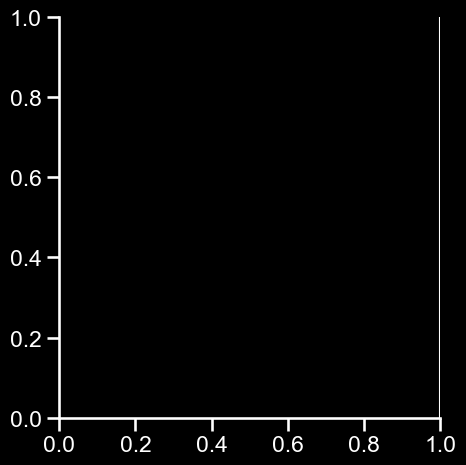

In [185]:
sns.displot([len(v) for v in groups], kde=True, rug=True);

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [16]:
# sns.displot([len(v) for k, v in graph.items()], kde=True, rug=True);

In [128]:
def gen_edges(start):
	edges = {}
	for edge in graph[start]:
		edges.setdefault(edge[0], []).append(edge)
	return edges

In [133]:
start = random.choice(list(graph.keys()))

print(start)

print(tabulate([[row[0], row[2], row[3]] for row in graph[start]], headers=['relation', 'term2', 'weight']))


# edges = gen_edges(start)
# options = [[rel, '\n'.join(row[2] for row in rows)] for rel, rows in edges.items()]
# print(tabulate(options, headers=['relation', 'term2']))

/c/en/stopping_standing_in
relation            term2                          weight
------------------  ---------------------------  --------
/r/Causes           /c/en/drip_across_rug               1
/r/Causes           /c/en/foul_odor                     1
/r/Causes           /c/en/gets_dry                      1
/r/Causes           /c/en/getting_hit_by_car            1
/r/Causes           /c/en/getting_out_of                1
/r/Causes           /c/en/jump                          1
/r/Causes           /c/en/jumping_out                   1
/r/Causes           /c/en/laying_in                     1
/r/Causes           /c/en/move_away_from                1
/r/Causes           /c/en/move_out                      1
/r/Causes           /c/en/movement                      1
/r/Causes           /c/en/shoes_to_get_wet              1
/r/Causes           /c/en/stopping_being_wet_by         1
/r/Causes           /c/en/walking_out_of                1
/r/HasPrerequisite  /c/en/moving             

In [136]:
import sys

In [167]:
fuel = 5

links = []

start = random.choice(list(graph.keys()))
current = start
for _ in range(fuel+1):
	if current in graph:
		links.append(random.choice(graph[current]))
		current = links[-1][2]

print(tabulate([[row[1], row[0], row[2], row[3]] for row in links], headers=['term1', 'relation', 'term2', 'weight']))

term1           relation        term2            weight
--------------  --------------  -------------  --------
/c/en/calmness  /r/DerivedFrom  /c/en/calm        1
/c/en/calm      /r/RelatedTo    /c/en/emotion     0.667
/c/en/emotion   /r/RelatedTo    /c/en/sad         0.102
/c/en/sad       /r/HasSubevent  /c/en/cry         2.828
/c/en/cry       /r/RelatedTo    /c/en/display     0.112


In [166]:
graph['/c/en/getting']

[['/r/Causes', '/c/en/getting', '/c/en/aquisition', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/being_happy', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/death', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/disappointment', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/feeling_indebted', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/get', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/gratitude', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/have_new_thing', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/having', '2.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/having_in_hand', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/having_to_take_care_of', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/headaches', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/illness', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/joy', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/let_down', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/losing', '1.0'],
 ['/r/Causes', '/c/en/getting', '/c/en/maki